# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1ThpK_nfciHuTnUuIxDiLqhuPsWsqV-q7?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [4]:
#- Passo 3: Extração/Obtenção de Dados

import pandas as pd
tabela = pd.read_csv("advertising.csv")
display(tabela)
tabela.info()

#- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
# obs: - TV, Jornal e Rádio estão em milhares de reais Vendas estão em milhões

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens
- correlação = onde 2 ou mais info estao correlacionados

In [5]:
# - Passo 5: Análise Exploratória

display(tabela.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

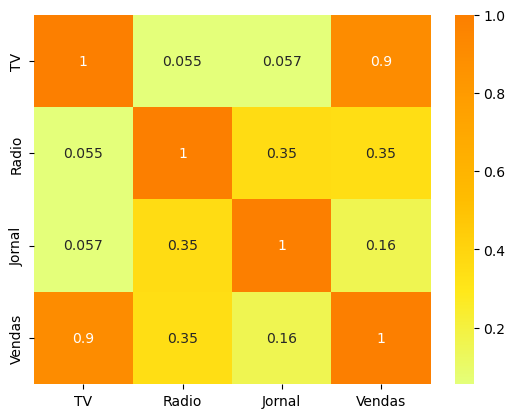

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# criando o gráfico usa o seaborn
sns.heatmap(tabela.corr(), cmap="Wistia", annot= True) # mapa de calor


# exibindo o gráfico usa o matplotlib
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste



In [14]:
# y - É quem nos queremos prever = vendas
y = tabela['Vendas']


# x - Quem vamos usar para prever o y = as colunas Radio, TV, Jornal
x = tabela[['TV', 'Radio', 'Jornal']]


from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [15]:
# 3 passos pra criar IA

# importando IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criando IA 

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()


# treinando IA
# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino) #.fit() treina 
modelo_arvoredecisao.fit(x_treino, y_treino)




RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [17]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.8870150368438042
0.9509752578691515


#### Visualização Gráfica das Previsões

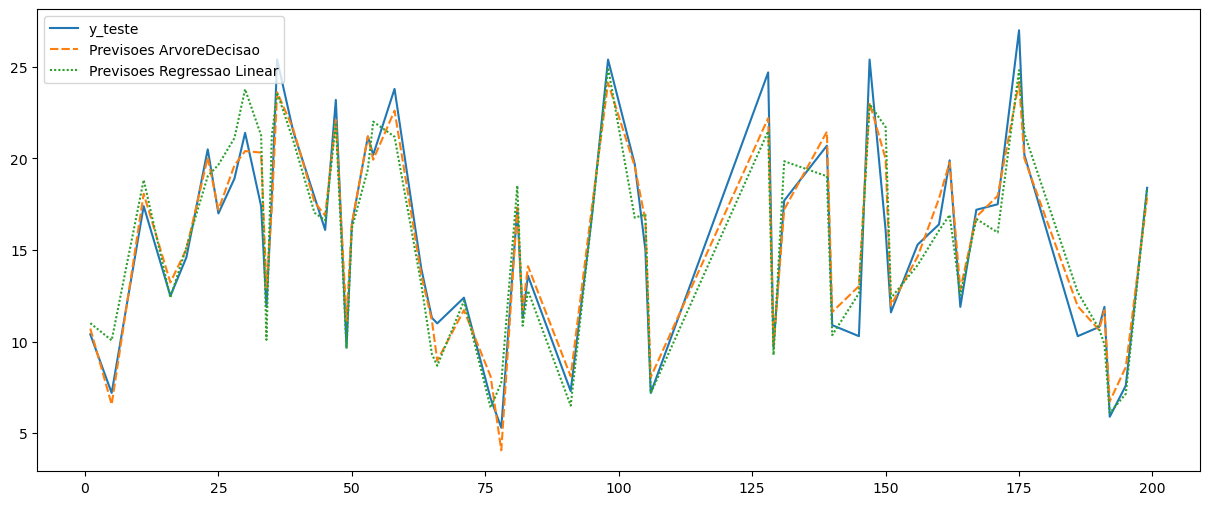

In [18]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [19]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.959  8.725 19.691]
